<a href="https://colab.research.google.com/github/Carlos2000-JGR/AppHERE/blob/main/Examen_final_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


Construya un modelo de clasificación con regresión logística (binario) usando Python para la variable categórica “Class” (benigno  o maligno) como variable respuesta. 

In [ ]:
data = pd.read_csv("/content/breast-cancer-wisconsin-data_set.csv")
data = data[data['BareNuclei '] != "?"]
data.head()

,Id,ClumpThickness,UnifCellSize,UnifCellShape,MargAdhesion,EpitCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
X = np.array(data.drop(['Class'],1))
y = np.array(data['Class'])
X.shape

(678, 10)

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



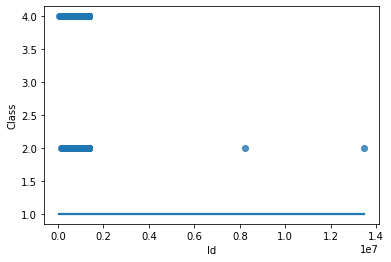

In [ ]:
x = data['Id']
y = data['Class']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

Realizar una muestra aleatoria de entrenamiento del 70% de elementos de datos para el modelo.

In [ ]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = random_state)

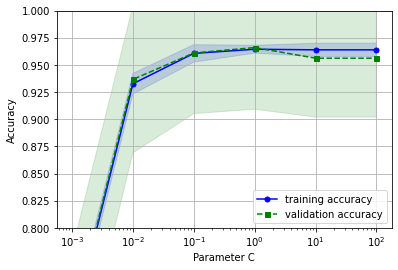

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve

param_range=[0.001,0.01,0.1,1.0,10.0,100.0]

train_scores,test_scores=validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='clf__C',
    param_range=param_range,
    cv=10
)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')

plt.plot(param_range,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.ylim([0.8,1.0])

plt.show()

Mide el nivel de desempeño del modelo construido con los datos de entrenamiento.

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

X_train2 = X_train[:, [4, 9]]

cv = list(StratifiedKFold(n_splits=3,random_state= None).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

KeyError: ignored

<Figure size 504x360 with 0 Axes>